In [16]:
# load libraries and scripts
import JSON
using Plots
using HDF5
using Trapz
using Statistics
include("../scripts/tools.jl")
include("../scripts/get_grid.jl")
include("../scripts/get_params.jl")
include("../scripts/disturbances.jl")
include("../scripts/stable.jl")
include("../scripts/dynamics.jl")

perform_dyn_sim (generic function with 1 method)

In [2]:
#load borders
#data, keys = import_json_numerics("../data/test/star30.json")
#border = 1000*data["border"];

border = import_border("../data/borders/border.json");

In [3]:
# create the lattice grid
dx = 10 
Nx, Ny, xrange, yrange, isinside, isborder, n, isgrid = get_grid(border, Float64(dx))

#isgrid = isinside .| isborder
isout = .!isinside .& .!isborder

# define x and y coordinate for plotting
#x = repeat(reshape(xrange,1,Nx), Ny, 1)
#y = repeat(reshape(yrange,Ny,1), 1, Nx);
x = repeat(reshape(1:Nx,1,Nx), Ny, 1)
y = repeat(reshape(1:Ny,Ny,1), 1, Nx);
xr = 1:Nx
yr = 1:Ny
#minimum(n[:,3].^2 + n[:,4].^2)

1:234

In [4]:
#plot(border[:,1], border[:,2])
#scatter(x[isinside], y[isinside], label="inside", markersize=3)
#scatter!(x[isborder], y[isborder], label="boundary", markersize=3)
#scatter!(x[isout], y[isout],label="ouside", markersize=3)

scatter(2x[isinside], 2*y[isinside], label="inside", markersize=2)
scatter!(2*x[isborder], 2*y[isborder], label="boundary", markersize=2)
#scatter!(2*x[isout], 2*y[isout],label="ouside", markersize=3)
#scatter!(2*x[isgrid], 2*y[isgrid],label="ouside", markersize=2)
#scatter!([2*60], [2*28],label="ouside", markersize=4)
#quiver!(vec(2*xr[Int64.(n[:,2])]), vec(2*yr[Int64.(n[:,1])]),
#    quiver=(8*vec(n[:,4]), 8*vec(n[:,3])), linewidth=0.5)

savefig("figure_b.pdf")

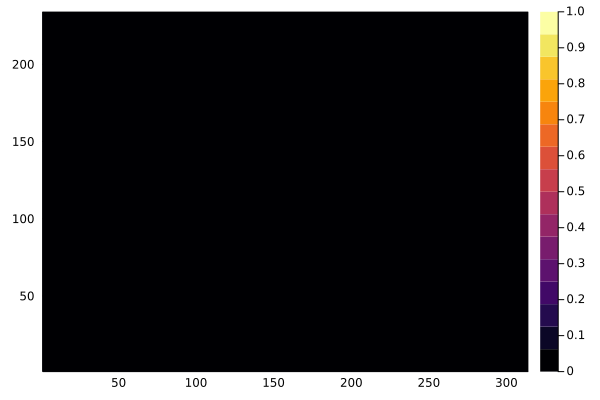

In [5]:
bx = 2 * ones(Ny, Nx)
by = 2 * ones(Ny, Nx)

# adding
#bx .+= local_disturbance(isinside, xrange, yrange, [-200., 250.], 4E6, 500.)
#by .+= local_disturbance(isinside, xrange, yrange, [-200., 250.], 4E6, 500.)

#no static injection
p = zeros(Ny, Nx)

# one "punctual" generator and one load
#p = local_disturbance(isinside, xrange, yrange, [-200.0, -0.0], 9.0, 100.)
#p .+= local_disturbance(isinside, xrange, yrange, [200.0, -0.0], -9.0, 100.)
#contour(p, fill=true)

[1000.0 0.0]
  3.613424 seconds (241.67 M allocations: 3.710 GiB, 21.08% gc time, 23.58% compilation time)


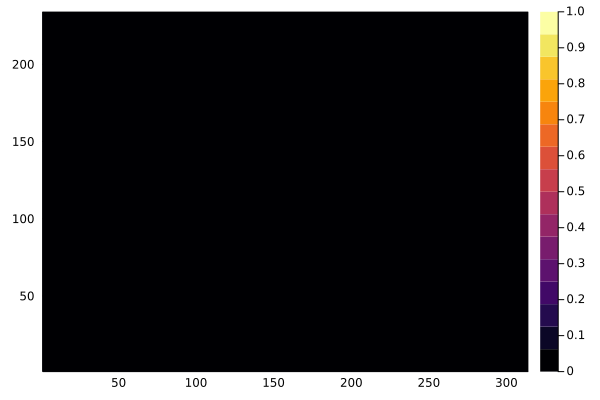

In [6]:
# compute the stable solution
th_ref, ths = compute_stable_sol(isinside, n, bx, by, p, Niter=14000, interval= 1000, tol=1E-9)
contour(th_ref, fill=true)

In [7]:
# evolution for debugging
#ctr_movie(Float64.(1:size(ths,3)), ths)
m = 1E-5*ones(Ny, Nx)
d = 0.6*copy(m)

m[.!isgrid] .= 0.0
d[.!isgrid] .= 0.0;

In [17]:
# perform a dynamical simulation
# adding a fault
#p = local_disturbance(isinside, xrange, yrange, [750.0, -250.0], -9.0, 100.)
p = local_disturbance(isinside, xrange, yrange, [0.0, 0.0], -9.0, 100.)

#p = local_disturbance(isinside, xrange, yrange, [100.0, -100.], -9.0, 100.)
ts, thetas, omegas = perform_dyn_sim(isinside, n, bx, by, p, m, d, th_ref, interval = 1000, Ndt = Int64(5E4), dt = 0.0001);

NIter: 1000 Omega: -0.026534103564695995
NIter: 2000 Omega: -0.05145609907089394
NIter: 3000 Omega: -0.07484498053557125
NIter: 4000 Omega: -0.09679782670159919
NIter: 5000 Omega: -0.11743010259657154
NIter: 6000 Omega: -0.13685169213110493
NIter: 7000 Omega: -0.15513490892809745
NIter: 8000 Omega: -0.1723153051411023
NIter: 9000 Omega: -0.18843324745645937
NIter: 10000 Omega: -0.2035796975109493
NIter: 11000 Omega: -0.21787590250606956
NIter: 12000 Omega: -0.23142529793861416
NIter: 13000 Omega: -0.2442685462695059
NIter: 14000 Omega: -0.2563852820234908
NIter: 15000 Omega: -0.267730615306738
NIter: 16000 Omega: -0.27828002462153767
NIter: 17000 Omega: -0.2880524942512385
NIter: 18000 Omega: -0.29710517992999513
NIter: 19000 Omega: -0.3055223984949349
NIter: 20000 Omega: -0.3133989577094465
NIter: 21000 Omega: -0.32081942992921675
NIter: 22000 Omega: -0.3278325785665779
NIter: 23000 Omega: -0.33443763004743005
NIter: 24000 Omega: -0.3406133929582844
NIter: 25000 Omega: -0.346391244398

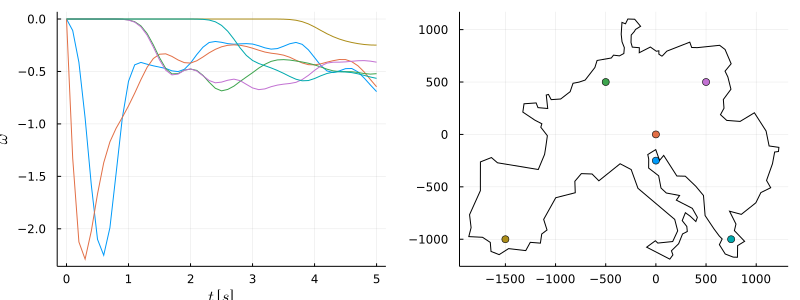

In [18]:
# plotting the frequency at different locations
coord = [0 -250; 0.0 0.0; -500 500; 500. 500.; -1500.0 -1000.0; 750.0 -1000]
#coord = [-250.0 -0; 0.0 0.0; 250 -250; 50. -480.]
time_plot(ts, omegas, coord, tstart = 0.0, tend = 50.0, borders = [border])
current()
#savefig("freq.pdf")


In [10]:
# evolution of the frequency
ctr_movie(ts, omegas, tstart = 0.0, tend = 50.0)

LoadError: UndefVarError: ts not defined

In [ ]:
# post-fault frequency
#println(sum(omegas[isinside,end])/sum(isinside))
#println(sum(omegas[isgrid,end])/sum(isgrid))
println(sum(p)/sum(d))
println(sum(p[isgrid])/sum(d[isgrid]))
println(sum(p[isinside])/sum(d[isinside]))
#trapz((yrange,xrange),p)/trapz((yrange,xrange),d) 